# Probing Density

In [1]:
import matplotlib.pyplot as plt
import random

On a 1-dimensional interval [0,1] there exists $n$ points. We know nothing about how the dots are spread out or how many of them there are.

We have one tool to our disposal: a probe. We can give the probe a position $x \in [0,1]$ and it will return the coordinates to the closest left and right dots. We define it as $probe(x): x \in [0,1] \rightarrow (l,r)$ where $l,r \in [0,1]$.

Our task is to approximate the number of dots that's present in the interval. Remember that we can assume nothing about the distribution of dots, as they are placed *arbitrarily*.

### The Probe Function
The probe function looks through the list of (sorted) generated dots and finds the dots left and right of the probed position.

In [2]:
def probe(x, dots):
    N = len(dots)
    for i, dot in enumerate(dots[:-1]):
        if x > dot:
            continue
        else:
            if i - 1 < 0:
                l = None
                r = dots[i]
            else:
                l = dots[i]
                r = dots[i+1]

            return (l,r)
            
    # If we get to the end there's no dots left of x
    return (dots[-1], None)

### The Interval

Let's visualize the interval with dots by placing 50 dots in a uniform random fashion.

In [3]:
plt.rcParams["figure.figsize"] = (20,5)
random.seed(1337)

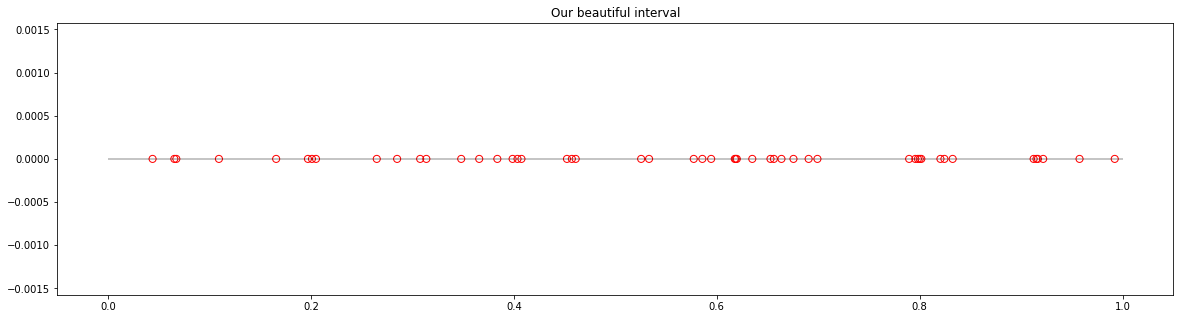

In [4]:
N = 50
dots = [random.uniform(0,1) for i in range(N)]
dots.sort()
y = [0 for i in range(N)]
plt.hlines(0,0,1, alpha=0.3)
plt.scatter(dots, y, s=50, facecolors='none', edgecolors='r')
plt.title('Our beautiful interval')
plt.show()

### A Simple Approach

One metric is the mean distance between points, $\bar{d}$. The inverse of $\bar{d}$ can be used to approximate the number of points $\bar{n} = 1 / \bar{d}$. 

One approach is to simply probe the line $k$ times and try to get a mean distance between the dots.

In [5]:
import numpy as np

def simple_probing(k):
    distances = []
    for i in range(k):
        x = random.uniform(0,1)
        l,r = probe(x, dots)

        # For now we skip edges
        if l and r:
            d = r - l
            distances.append(d)

    dists = np.array(distances)
    d_mean = dists.mean()
    return 1 / d_mean


Let's run the simple probing algorithm and see some approximations

In [8]:
approximations = []
for i in range(100):
    n_approx = simple_probing(1000)
    approximations.append(n_approx)

sd_mean = np.array(approximations).mean();
sd_std = np.array(approximations).std();
print("Sample Distribution Mean: %.2f" % sd_mean)
print("Sample Distribution STD: %.2f" % sd_std)

Sample Distribution Mean: 62.26
Sample Distribution STD: 2.16


Okay, not very nice

### Interval Inception

Let's try to divide the interval into... more intervals! And maybe our accuracy will improve.

![InceptionURL](https://media.giphy.com/media/lBtI8rRETmQMg/giphy.gif "inception")